# **Midterm Test 1 - Question**

Aug 26, 2024

---



## **Bài thi giữa kỳ**
- Dataset sử dụng:
    - Medical Cost Personal
    - './insurance.csv'
    - link kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
    
- Loại câu hỏi:
    - Tìm hiểu dữ liệu
    - Regression problem
    - Classification problem

- Các câu hỏi trong đề thi sử dụng chung một tập dữ liệu, Medical Cost Personal. Tập dữ liệu này mô tả thông tin về số tiền bảo hiểm y tế nhận được của mỗi cá nhân:
    - `age`: số tuổi của người đăng ký bảo hiểm
    - `sex`: giới tính
    - `bmi`: chỉ số Body mass index (cung cấp thông tin hiểu biết về cân thể dựa trên cân nặng, chiều cao)
    - `children`: số lượng con trẻ tham gia bảo hiểm y tế
    - `smoker`: tình trạng hút thuốc
    - `regions`: khu vực cư trú ở Mỹ
    - `charges`: chi phí cá nhân mà bảo hiểm y tế thanh toán

- Để đảm bảo tính thống nhất trong các quá trình ngẫu nhiên, học viên chọn giá trị `random_state = 42`.

## **Cài đặt thư viện**

In [1]:
# Cài các thư viện
######################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve


# Code
######################
random_state = 42

## **Phần 1. Tìm hiểu dữ liệu (3 điểm)**

### **Câu 1**(1 điểm): Sử dụng Pandas

1.1. (0.25 điểm) In ra mô tả số liệu của dữ liệu (*descriptive statistics*)

In [2]:
######################
# Code
data = pd.read_csv('insurance.csv')
data.head()
######################

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.2. (0.5 điểm) Kiểm tra xem dữ liệu có missing value không? Nếu có hãy điền theo giá trị trung bình (*mean*) (0.5 điểm)

In [5]:
######################
# Code
data.isnull().sum()
######################

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1.3. (0.25 điểm) Kiểm tra xem dữ liệu có mẫu nào bị trùng lặp không? Nếu có hãy loại bỏ

In [7]:
######################
# Code
data.duplicated().sum()
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)

data.duplicated().sum()    
######################

np.int64(0)

### **Câu 2** (2 điểm): Visualization sử dụng Seaborn (2 điểm)

2.1. (0.5 điểm) Vẽ biểu đồ cột các giá trị của `sex`, `smoker`

<Axes: xlabel='count', ylabel='sex'>

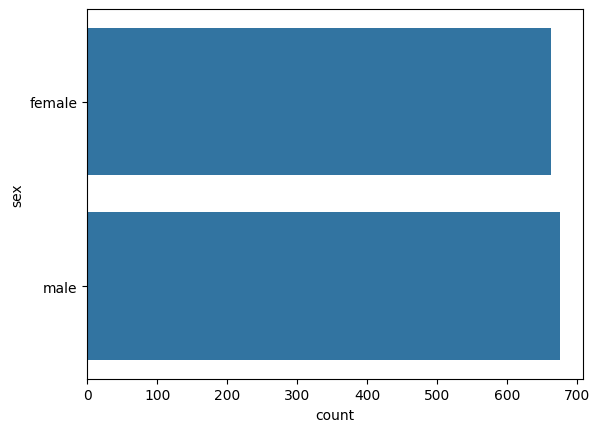

In [8]:
######################
# Gợi ý: countplot của Seaborn
# Code
sns.countplot(data['sex'])
######################

<Axes: xlabel='count', ylabel='smoker'>

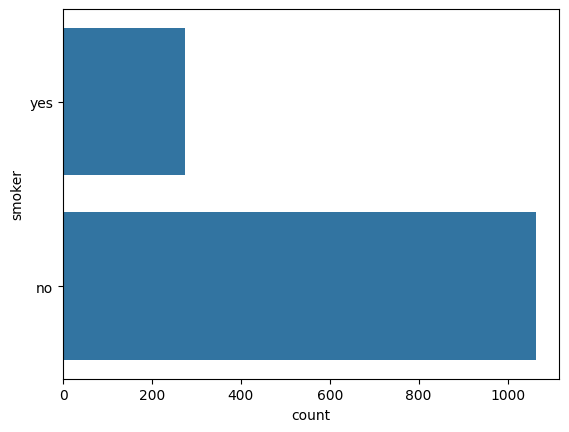

In [9]:
sns.countplot(data['smoker'])

2.2. (0.5 điểm) Vẽ biểu đồ histogram biểu thị phân phối của `age`, `bmi`, `children` và `charges`

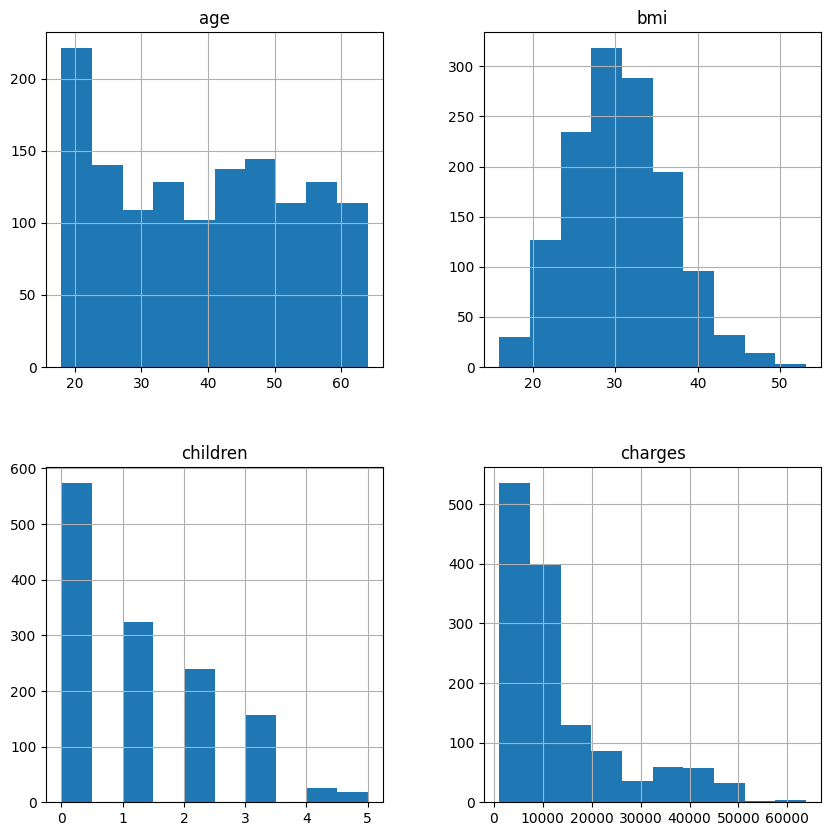

In [11]:
######################
# Gợi ý: histogram của Pandas
# Code
data.hist(column=['age', 'bmi', 'children', 'charges'], figsize=(10, 10))
plt.show()

######################

2.3. (0.5 điểm) Vẽ biểu đồ nhiệt (*heat map*) của ma trận tương quan (*correlation matrix*) giữa các trường dữ liệu `numberic`

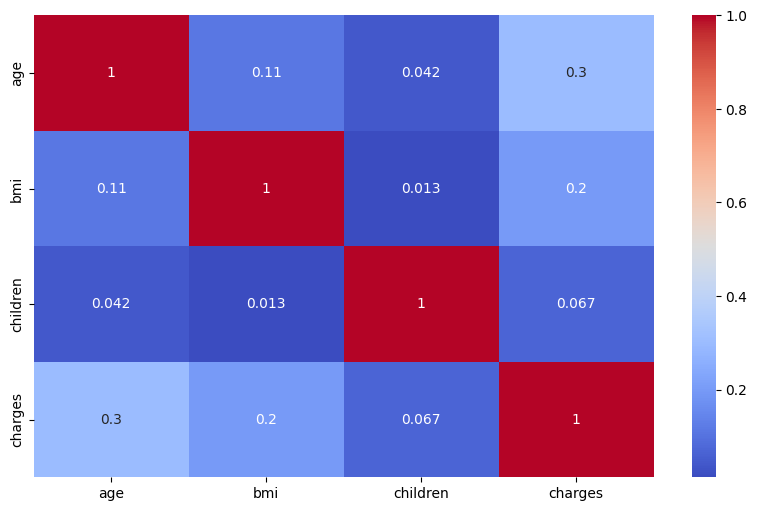

In [12]:
######################
# Gợi ý: heatmap của Seaborn
# Code
data_numberic = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(data_numberic.corr(), annot=True, cmap='coolwarm')
plt.show()

######################

2.4. (0.5 điểm) Vẽ biểu đồ hộp của các cột kiểu Category đối với cột `charges`

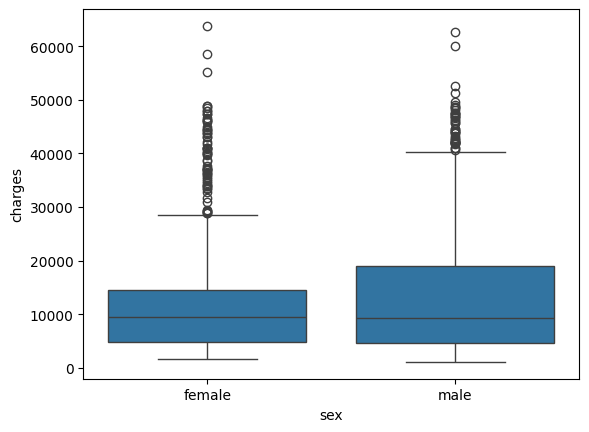

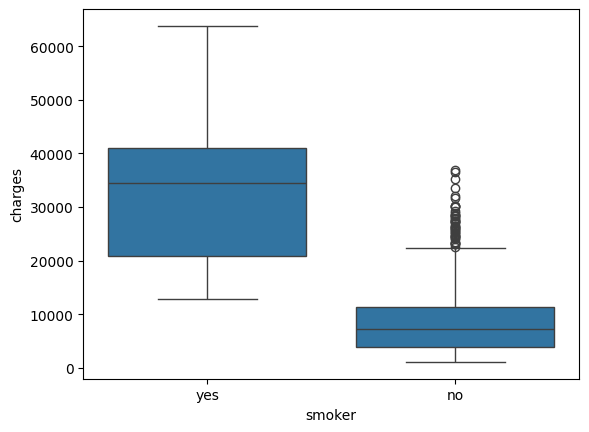

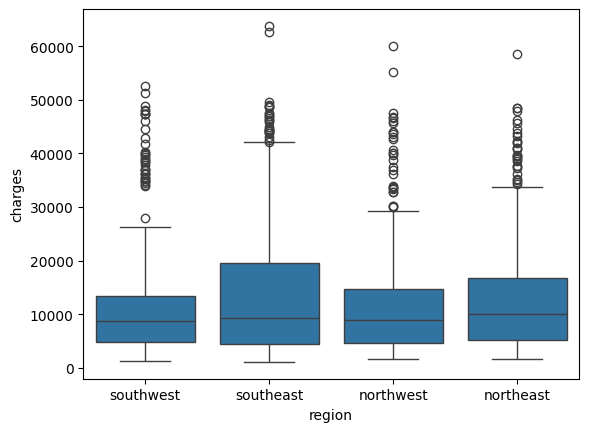

In [15]:
######################
# Gợi ý: sử dụng vòng lặp for và boxplot của Seaborn
# Code

#  Vẽ biểu đồ hộp của các cột kiểu Category đối với cột `charges`
for col in data.select_dtypes(exclude=[np.number]):
    sns.boxplot(x=col, y='charges', data=data)
    plt.show()
    


######################

## **Phần 2. Regression (3 điểm)**

- **Bài toán**: Trong phần này, thuộc tính `charges` được tách ra để làm giá trị dự đoán. Hay nói cách khác, bài toán Regression ở đây được phát biểu là: **Dự đoán `charges` khi biết thông tin một số trường khác**.
- **Phương pháp**: Linear Regression và Ridge Regression.
- **Độ đo**: Mean Absolute Error (*MAE*), Root Mean Square Error (*RMSE*).
- **Chú ý**: Các câu hỏi dưới đây lần lượt nêu các bước để tạo dữ liệu và tạo mô hình huấn luyện


### **Câu 3** (1 điểm): Tạo một bản sao của dữ liệu gốc mà ở đó:

- Tách cột `charges` làm target
- **Label Encode** các thuộc tính Categorical
- **Standard Scaler** chuẩn hóa dữ liệu bản sao
- Chia 2 tập **train, test** sử dụng train_test_split với **seed = random_state** và **tỉ lệ bằng 0.3**

In [17]:
######################
# Gợi ý: sử dụng 
# Label Encode** các thuộc tính Categorical
# Code
dataset = data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataset.select_dtypes(include=[object]):
    dataset[col] = le.fit_transform(dataset[col])

X = dataset.drop('charges', axis=1)
y = dataset['charges']
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
######################

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((935, 6), (402, 6), (935,), (402,))

In [23]:
for i in range(X_train.shape[1]):
    print(f'Column {i}: max={X_train[:, i].max()}, min={X_train[:, i].min()}')

Column 0: max=1.7649206102345572, min=-1.5116474702606657
Column 1: max=0.9903235535625419, min=-1.0097709949467006
Column 2: max=3.6841359219939767, min=-2.4111187091772748
Column 3: max=3.2397285521666808, min=-0.9092341626291546
Column 4: max=1.9696603879338235, min=-0.507701736870995
Column 5: max=1.3431627088734448, min=-1.3722735941968105


### **Câu 4** (2 điểm): Huấn luyện

4.1. (1 điểm) Linear Regression:

*   In ra độ đo MAE và RMSE trên tập test.

In [24]:
######################
# Gợi ý: sử dụng Sklearn
# Code
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(np.mean((y_test - y_pred) ** 2))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')
######################

MAE: 4182.8037770701585
RMSE: 6239.80937294087


4.2. (1 điểm) Ridge Regression (1 điểm):

- Tìm kiếm tham số alpha thuộc khoảng `np.range(0, 1, 0.01)`.
- In ra giá trị alpha tối ưu tìm được.
- In ra độ đo MAE và RMSE trên tập test.

In [25]:
######################
# Gợi ý: sử dụng Sklearn
# Code
from sklearn.linear_model import Ridge
param_grid = {'alpha': np.arange(0, 1, 0.01)}  

from sklearn.model_selection import GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)

alpha_best = ridge_cv.best_params_['alpha']
MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(np.mean((y_test - y_pred) ** 2))

print(f'Best alpha: {alpha_best}')
print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')  
######################

Best alpha: 0.99
MAE: 4184.77512201345
RMSE: 6242.102182905331


## **Phần 3. Classification (4 điểm)**

- Cột `smoker` được tách ra làm nhãn.
- Dữ liệu training bao gồm các trường: `age`, `sex,` `bmi` và `children`.
- Mô hình sử dụng:
    - Support Vector Machine (SVM)
    - Random Forest (RF)

### **Câu 5** (2 điểm): Tạo dữ liệu và nhãn

- Tách các trường dùng để train; Tách nhãn, đưa nhãn về `0,1`.
- Các trường mang thuộc tính phân loại (Category) cần được mã hóa phù hợp.
- Các trường mang thuộc tính giá trị (Numeric) cần được đưa về miền `[0,1]`.
- Chia dữ liệu với tỉ lệ tập test bằng 0.3 và giá trị random_state đã cho

(Mỗi ý 0.5 điểm)

In [ ]:
######################
# Gợi ý: sử dụng Sklearn
# Code
######################

### **Câu 6** (2 điểm): Huấn luyện

- Sử dụng **GridSearchCV**, độ đo đánh giá là **accuracy** để tìm kiếm siêu tham số. **Chú ý** tham số của hàm GridSearchCV lấy giá trị mặc định.
- In ra bộ tham số tốt nhất và in ra độ chính xác của mỗi mô hình trên tập test.

(Mỗi mô hình 1 điểm)

In [ ]:
# SVM  (1.0 điểm)
from sklearn import svm

params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf', 'poly'] }
######################
# Gợi ý: sử dụng Sklearn
# Code
######################

In [ ]:
# RF  (1.0 điểm)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=random_state)
dict_param = {
    'max_depth': [3, 11, 15, 24, 27],
    'min_samples_leaf': [1, 5, 7, 10, 20, 50, 100],
    'max_features': [1.0,'log2','sqrt','auto'],
    'n_estimators': [5, 15, 20, 50, 75, 100]
}
######################
# Gợi ý: sử dụng Sklearn
# Code
######################